<a href="https://colab.research.google.com/github/Michaeljo112/Clustering/blob/main/regularidad_fortuita.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Patrones de regularidad**

In [1]:
import random
import numpy as np

In [2]:
# Antes de hacer más "complicado", vamos el siguiente código
dado1 = [1, 2, 3, 4, 5, 6]
dado2 = [1, 2, 3, 4, 5, 6]

In [3]:

np.random.seed(12)

cara_dado1 = random.choices(dado1, k=1)
cara_dado2 = random.choices(dado2, k=1)
suma = cara_dado1[0] + cara_dado2[0]
suma

9

In [4]:
def suma_caras(ensayo):
  x = [i for i in range(1, ensayo+1)]
  y = []
  resultados_potenciales = [1, 2, 3, 4, 5, 6]
  for i in range(1, ensayo+1):
      # Crear una suma aleatoria
      suma = random.choices(resultados_potenciales, k=1)[0] + random.choices(resultados_potenciales, k=1)[0]
      y.append(suma)
  return(x, y)

In [5]:
x, y = suma_caras(10)
x, y

([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [7, 2, 11, 6, 8, 9, 7, 3, 10, 6])

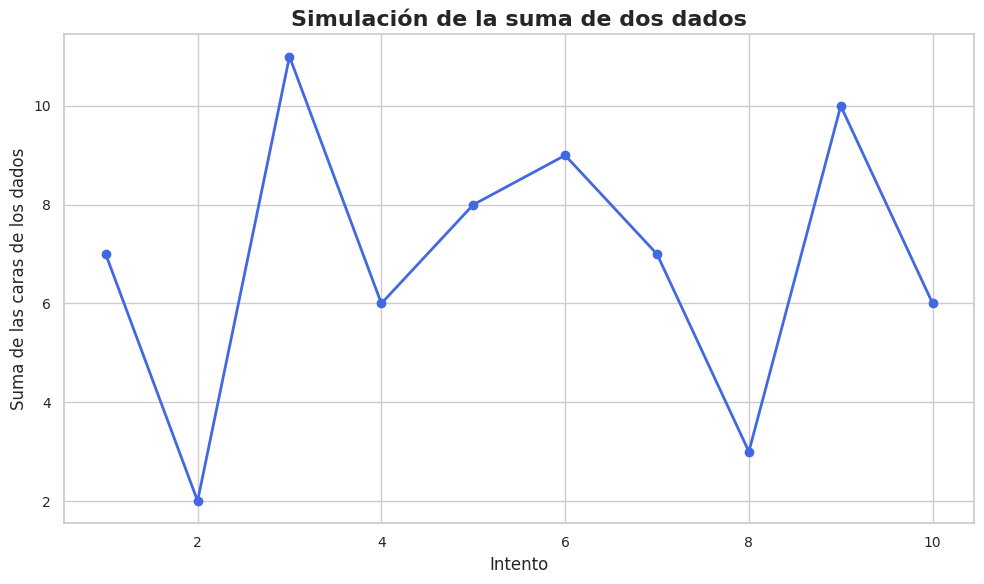

In [6]:
# Mejorando estilo de un gráfico de suma de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo general
sns.set(style="whitegrid")  # Estilo limpio con cuadrícula

# Gráfico mejorado
plt.figure(figsize=(10, 6))  # Tamaño adecuado
plt.plot(x, y, marker='o', linestyle='-', color='royalblue', linewidth=2, markersize=6, label="Suma de dados")

# Título y etiquetas
plt.title("Simulación de la suma de dos dados", fontsize=16, fontweight='bold')
plt.xlabel("Intento", fontsize=12)
plt.ylabel("Suma de las caras de los dados", fontsize=12)

# Personalización de ejes
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

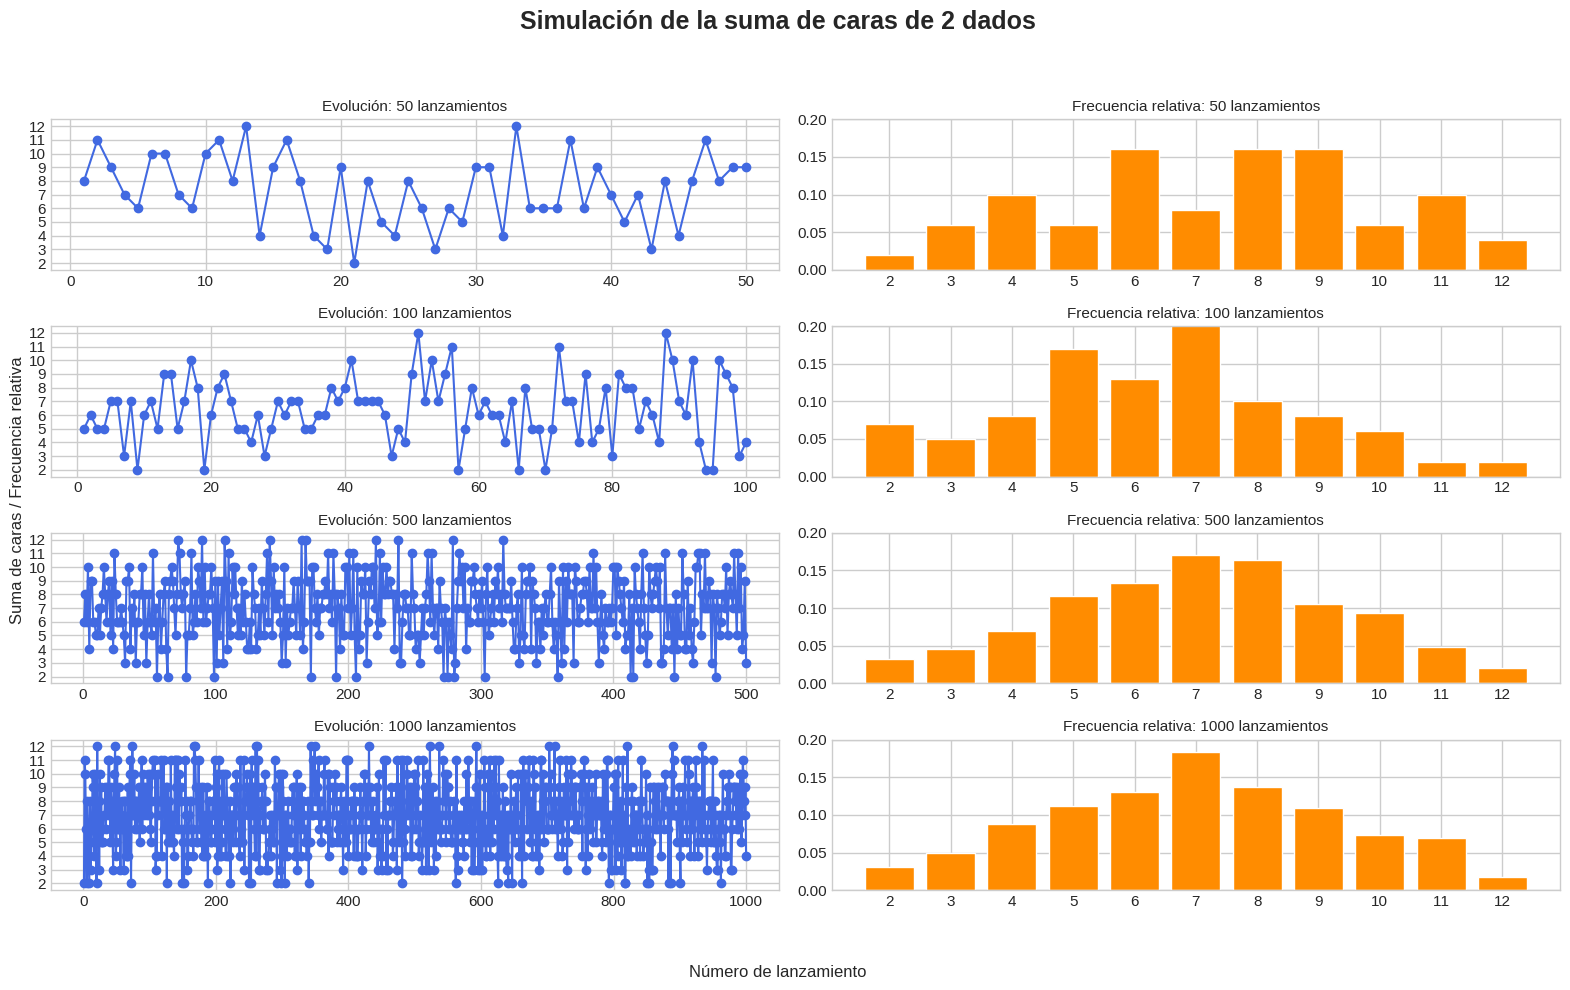

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Simulaciones (asumiendo que sum_2_tice(n) devuelve (x, y))
x1, y1 = suma_caras(50)
x2, y2 = suma_caras(100)
x3, y3 = suma_caras(500)
x4, y4 = suma_caras(1000)

# Cálculo de frecuencias relativas
def frecuencias_relativas(y):
    return {k: y.count(k)/len(y) for k in range(2, 13)}

frecuencias1 = frecuencias_relativas(y1)
frecuencias2 = frecuencias_relativas(y2)
frecuencias3 = frecuencias_relativas(y3)
frecuencias4 = frecuencias_relativas(y4)

# Estilo de gráfico
plt.style.use('seaborn-v0_8-whitegrid')
fig, axs = plt.subplots(4, 2, figsize=(16, 10))
fig.suptitle('Simulación de la suma de caras de 2 dados', fontsize=18, fontweight='bold')

simulaciones = [(x1, y1, frecuencias1, '50 lanzamientos'),
                (x2, y2, frecuencias2, '100 lanzamientos'),
                (x3, y3, frecuencias3, '500 lanzamientos'),
                (x4, y4, frecuencias4, '1000 lanzamientos')]

for i, (x, y, frec, titulo) in enumerate(simulaciones):
    axs[i, 0].plot(x, y, marker='o', linestyle='-', color='royalblue')
    axs[i, 0].set_yticks(range(2, 13))
    axs[i, 0].set_title(f'Evolución: {titulo}', fontsize=11)

    axs[i, 1].bar(frec.keys(), frec.values(), color='darkorange')
    axs[i, 1].set_xticks(range(2, 13))
    axs[i, 1].set_ylim(0, 0.2)
    axs[i, 1].set_title(f'Frecuencia relativa: {titulo}', fontsize=11)

# Etiquetas globales
fig.supxlabel('Número de lanzamiento', fontsize=12)
fig.supylabel('Suma de caras / Frecuencia relativa', fontsize=12)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()